# Data analysis stock prices

In this data project i focused on exploratory data analysis of stock prices. This project is not meant to be a robust financial analysis or be taken as financial advice. I focused on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

I needed to get data using pandas datareader. I got stock information for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

There are some basic and advanced questions for us:
- What is the max Close price for each bank's stock throughout the time period?
- What dates each bank stock had the best and worst single day returns?
- Which stock could we classify as the riskiest over the entire time period?
- Which would we classify as the riskiest for the year 2015?

Where i used the data from "*yahoo finance*":

## Let's get started

First, we need to import some libraries:

In [2]:
#Up to date remote data access for pandas
from pandas_datareader import data, wb
#import numpy and pandas for working with dataframes
import pandas as pd
import numpy as np
#import datetimefor manipulating dates and times 
import datetime
# import plotting libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

First, we need to set the time in period from 2006 to 2016, to extract the data:

In [4]:
start_date = datetime.date(2006, 1, 1)
end_date = datetime.date(2016, 1, 1)

In [5]:
#grab info on the stock
BAC = data.DataReader("BAC", "yahoo", start_date, end_date)
C = data.DataReader("C", "yahoo", start_date, end_date)
GS = data.DataReader("GS", "yahoo", start_date, end_date)
JPM = data.DataReader("JPM", "yahoo", start_date, end_date)
MS = data.DataReader("MS", "yahoo", start_date, end_date)
WFC = data.DataReader("WFC", "yahoo", start_date, end_date)

In [6]:
#define list of tickers for each bank
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

In [7]:
'''
We use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks.
And we set the keys argument equal to the tickers list
'''
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys = ["BAC", "C", "GS", "JPM", "MS", "WFC"], axis = 1)

In [8]:
#We set the column name levels
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [9]:
#check the head
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.429329  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.455013  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.557716  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.596241  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.994202  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.408512  
2006-01-04   31.799999  31.530001  10870000.0  20.171795  
2006-01-05   31.500000  31.495001  10158000.0  20.149401  
2006-01-06   31.580000  31.680000   8403800.0  20.267757  
2006-01-09   31.674999  31.674999   5619600.0  20.264565  

[5 rows x 36 columns]

So, now we can try to answer for basic questions. The max Close price for each bank's stock throughout the time period is:

In [10]:
bank_stocks.xs("Close",level = "Stock Info", axis = 1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

For the second question we should create new DataFrame, which will include returns for each bank's stocks. Returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

We can use the method **pct_chanhe()** for calculating returns

In [11]:
#define empty dataframe
returns = pd.DataFrame()

In [13]:
#we fill our new DataFrame with Close-preise returns 
returns = bank_stocks.xs("Close", level = "Stock Info", axis = 1).pct_change()
returns.columns = returns.columns.map(lambda r: r+" Return")
returns.head()

Bank Ticker,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


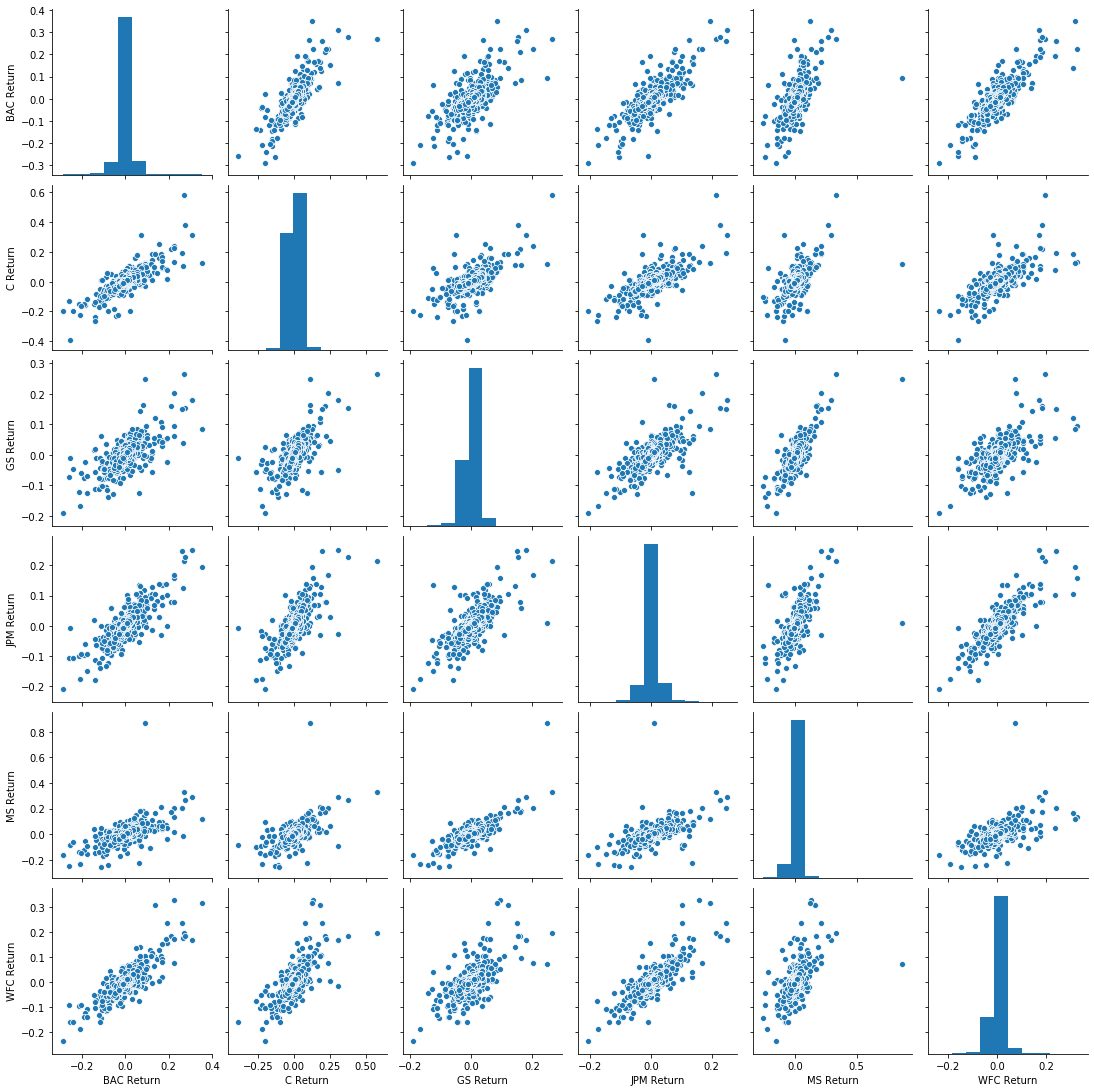

In [14]:
#We create a pairplot using seaborn
sns.pairplot(returns[1:])

We notice the enormous crash in value for Citigroup's Stock

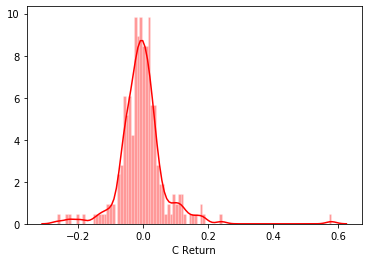

In [27]:
#distplot of the 2008 returns for CitiGroup
sns.distplot(returns.loc["2008-01-01":"2008-12-31"]["C Return"], hist_kws = dict(edgecolor = "white", linewidth = 0.5), color = "red", bins = 100)

Now we can answer for other questions. What dates each bank stock had the best single day returns:

In [16]:
returns.idxmax()

Bank Ticker
BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

We see the best single day gain citigroup stock and goldman sachs split in November 2008, but also JPM day after inauguration.

What dates each bank stock had the worst single day returns:

In [18]:
returns.idxmin()

Bank Ticker
BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

We notice the worst Drop (4 of them on Inauguration of USA'S president day)

We could classify City group as the riskiest over the entire time period:

In [20]:
returns.std()

Bank Ticker
BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

We can classify as the riskiest for the year 2015 Morgan Stanley or Bofa, they have very similar risk profiles:

In [22]:
returns.loc["2015-01-01":"2015-12-31"].std()

Bank Ticker
BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

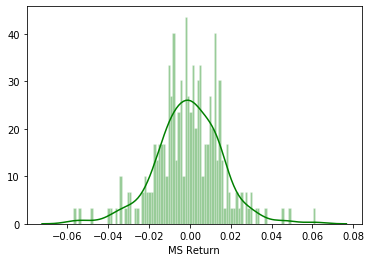

In [25]:
#distplot of the 2015 returns for Morgan Stanley
sns.distplot(returns.loc["2015-01-01":"2015-12-31"]["MS Return"], hist_kws = dict(edgecolor = "white", linewidth = 0.5), color = "green", bins = 100)

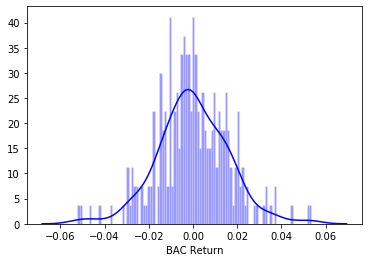

In [28]:
#distplot of the 2015 returns for BofA
sns.distplot(returns.loc["2015-01-01":"2015-12-31"]["BAC Return"], hist_kws = dict(edgecolor = "white", linewidth = 0.5), color = "blue", bins = 100)

### Now let's move on some visualizations:

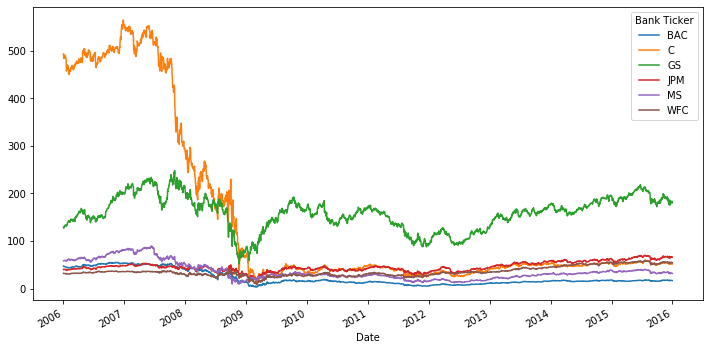

In [31]:
#line plot showing Close price for each bank for the entire index of time
bank_stocks.xs("Close",level = "Stock Info", axis = 1).plot(figsize = (12,6))

We will look at 2008 year:

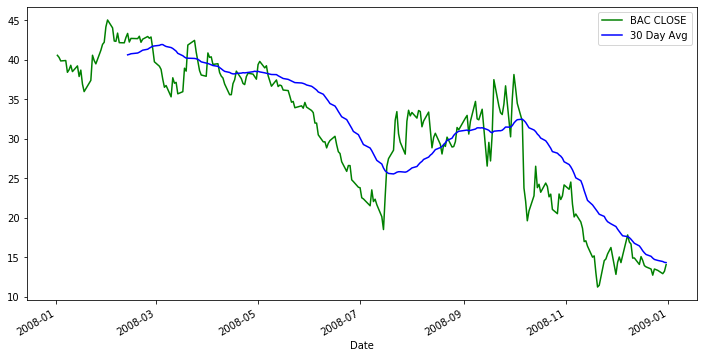

In [33]:
#Plot of the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008
plt.figure(figsize = (12,6))
BAC.loc["2008-01-01":"2009-01-01"]["Close"].plot(label = "BAC CLOSE", color = "green")
BAC.loc["2008-01-01":"2009-01-01"]["Close"].rolling(30).mean().plot(label = "30 Day Avg", color = "blue")
plt.legend()

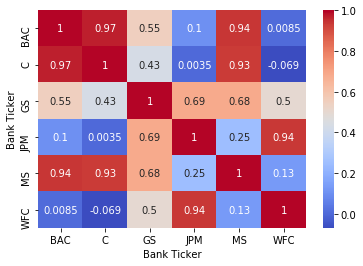

In [34]:
#heatmap of the correlation between the stocks Close Price
sns.heatmap(bank_stocks.xs("Close", level = "Stock Info", axis = 1).corr(), cmap = "coolwarm", annot = True)

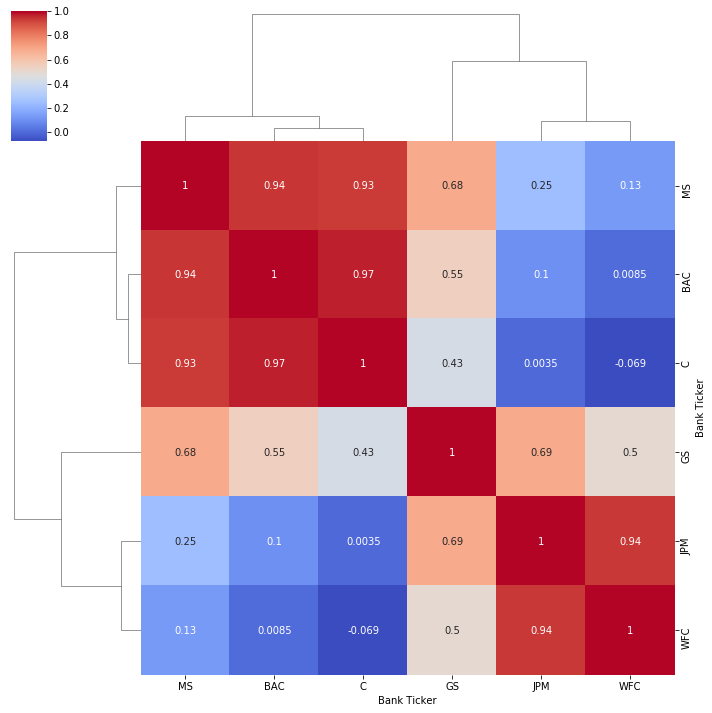

In [35]:
#we will use clustermap to cluster the correlations together
sns.clustermap(bank_stocks.xs("Close", level = "Stock Info", axis = 1).corr(), cmap = "coolwarm", annot = True)

As we see financial crisis 2007-2008 was very hard